<a href="https://colab.research.google.com/github/DanielBerriel/projeto_big_data_python/blob/main/AnaliseVagasTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Leitura do arquivo em csv

In [13]:
df = pd.read_csv('/content/final_data.csv')
df.sample(3)

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
564,ACURA SOLUTIONS LTD,Class 4,Software QA Engineer 2 / Senior QA Engineer / ...,Tamil Nadu,26.0,11245.0,Full-time,Mid-Senior level,110.0,Real Estate,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319,IDESLABS PRIVATE LIMITED,Class 4,Change Manager,Karnataka,51.0,80865.0,Contract,Mid-Senior level,1200.0,IT Services and IT Consulting,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wipro,Class 3,Project Manager,Maharashtra,119.0,6737300.0,Full-time,Entry level,10001.0,IT Services and IT Consulting,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Verificando as colunas do dataframe

In [8]:
df.columns.tolist()

['Company_Name',
 'Class',
 'Designation',
 'Location',
 'Total_applicants',
 'LinkedIn_Followers',
 'Level',
 'Involvement',
 'Employee_count',
 'Industry',
 'PYTHON',
 'C++',
 'JAVA',
 'HADOOP',
 'SCALA',
 'FLASK',
 'PANDAS',
 'SPARK',
 'NUMPY',
 'PHP',
 'SQL',
 'MYSQL',
 'CSS',
 'MONGODB',
 'NLTK',
 'TENSORFLOW',
 'LINUX',
 'RUBY',
 'JAVASCRIPT',
 'DJANGO',
 'REACT',
 'REACTJS',
 'AI',
 'UI',
 'TABLEAU',
 'NODEJS',
 'EXCEL',
 'POWER BI',
 'SELENIUM',
 'HTML',
 'ML']

Pré-processamento de dados:

1- Verificar se existe valores vazios no conjunto de dados

In [11]:
def verifica_valores_vazios(column):
    null_porcentagem = df[column].isnull().sum() / df[column].size
    print(f' coluna: "{column}" possui {null_porcentagem:.2%} valores vazios.')

for column in df.columns:
    verifica_valores_vazios(column)

 coluna: "Company_Name" possui 0.00% valores vazios.
 coluna: "Class" possui 1.85% valores vazios.
 coluna: "Designation" possui 1.85% valores vazios.
 coluna: "Location" possui 1.85% valores vazios.
 coluna: "Total_applicants" possui 1.85% valores vazios.
 coluna: "LinkedIn_Followers" possui 1.85% valores vazios.
 coluna: "Level" possui 1.85% valores vazios.
 coluna: "Involvement" possui 1.85% valores vazios.
 coluna: "Employee_count" possui 1.85% valores vazios.
 coluna: "Industry" possui 1.85% valores vazios.
 coluna: "PYTHON" possui 1.85% valores vazios.
 coluna: "C++" possui 1.85% valores vazios.
 coluna: "JAVA" possui 1.85% valores vazios.
 coluna: "HADOOP" possui 1.85% valores vazios.
 coluna: "SCALA" possui 1.85% valores vazios.
 coluna: "FLASK" possui 1.85% valores vazios.
 coluna: "PANDAS" possui 1.85% valores vazios.
 coluna: "SPARK" possui 1.85% valores vazios.
 coluna: "NUMPY" possui 1.85% valores vazios.
 coluna: "PHP" possui 1.85% valores vazios.
 coluna: "SQL" possui 1.

2- Verificando se existem valores duplicados

In [15]:
if df.duplicated().any():
    print("Valores iguais encontrados!")
else:
    print("Valores iguais não encontrados!")

Valores iguais não encontrados!


3- Verificar os tipos de dados

In [16]:
dados_formatados = []
nome_coluna_largura = 30
coluna_valor_largura = 35

for column_name, column_value in df.loc[1].items():
    column_dtype = df[column_name].dtype
    dados_formatados.append(f"{column_name.ljust(nome_coluna_largura)}{str(column_value).ljust(coluna_valor_largura)}{column_dtype}")

sample_output = "\n".join(dados_formatados)
print(sample_output)

Company_Name                  Wipro                              object
Class                         Class 3                            object
Designation                   Project Manager                    object
Location                       Delhi                             object
Total_applicants              121.0                              float64
LinkedIn_Followers            6737300.0                          float64
Level                         Full-time                          object
Involvement                    Entry level                       object
Employee_count                10001.0                            float64
Industry                       IT Services and IT Consulting     object
PYTHON                        0.0                                float64
C++                           0.0                                float64
JAVA                          0.0                                float64
HADOOP                        0.0                         

Análise de Dados:

1 - Verificar quais são as 20 profissões da área de tecnologia mais procuradas pelas empresas no LinkedIn


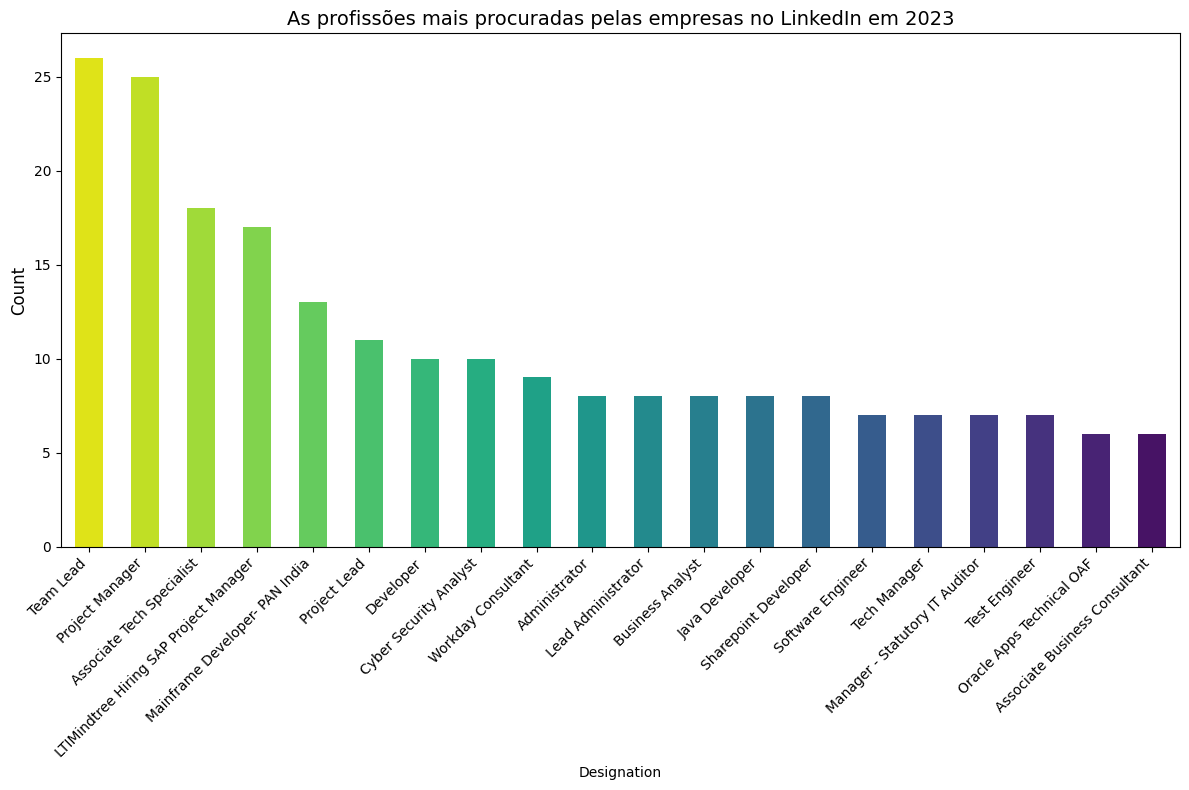

In [19]:
prof_mais_procuradas = df['Designation'].value_counts().head(20)

color_palette = sns.color_palette("viridis", len(prof_mais_procuradas))

prof_mais_procuradas.plot(kind='bar', color=color_palette[::-1], figsize=(12, 8))

plt.title('As profissões mais procuradas pelas empresas no LinkedIn em 2023', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()


2 - Verificar a popularidade das principais tecnologias do mercado

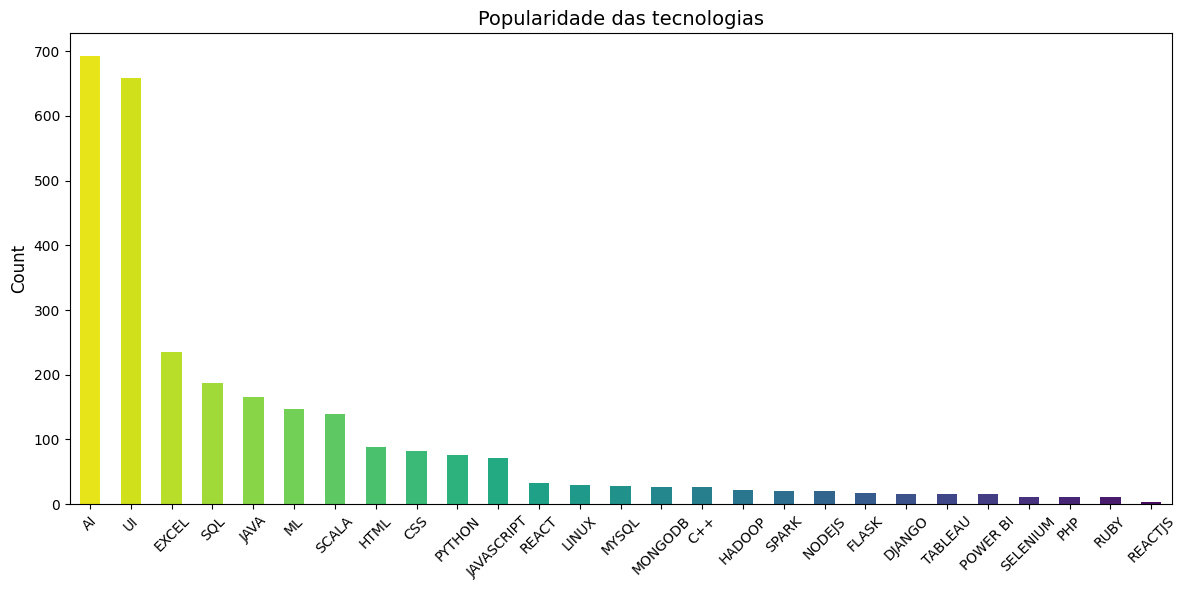

In [20]:
tecnologias_contador = df[df.columns[10:]].sum().sort_values(ascending=False)[:27]

color_palette = sns.color_palette("viridis", len(tecnologias_contador))

plt.figure(figsize=(12, 6))

tecnologias_contador.plot(kind='bar', color=color_palette[::-1])

plt.title('Popularidade das tecnologias', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

3- Verificar a distribuição das ofertas de emprego por nível de cargo

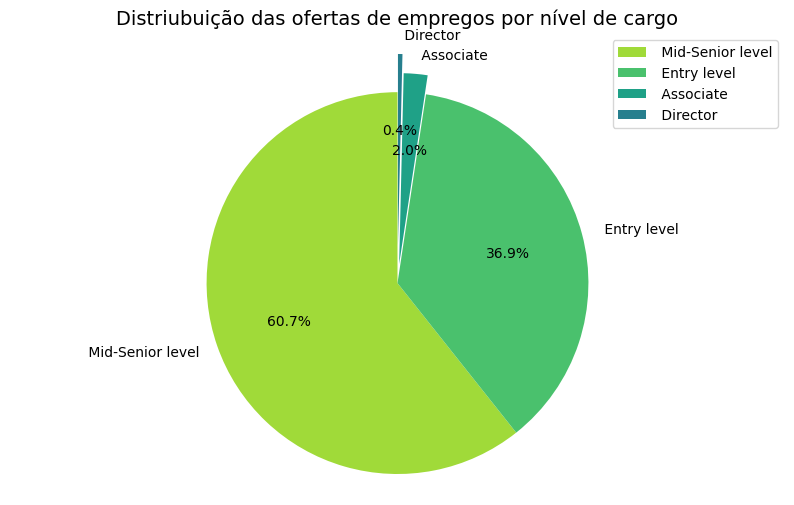

In [21]:
nivel_contador = df.Involvement.value_counts().sort_values(ascending=False)

explode = (0, 0, 0.1, 0.2)
color_palette = sns.color_palette("viridis")[::-1]

plt.figure(figsize=(10, 6))

plt.pie(nivel_contador, labels=nivel_contador.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=sns.color_palette("viridis")[::-1])

plt.legend(loc='best')

plt.title('Distriubuição das ofertas de empregos por nível de cargo', fontsize=14)

plt.axis('equal')
plt.show()

4 - Verificar as principais indústrias contratantes

<ipython-input-27-fdedb7c8c0c7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industries_count.index, y=industries_count.values, palette = color_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

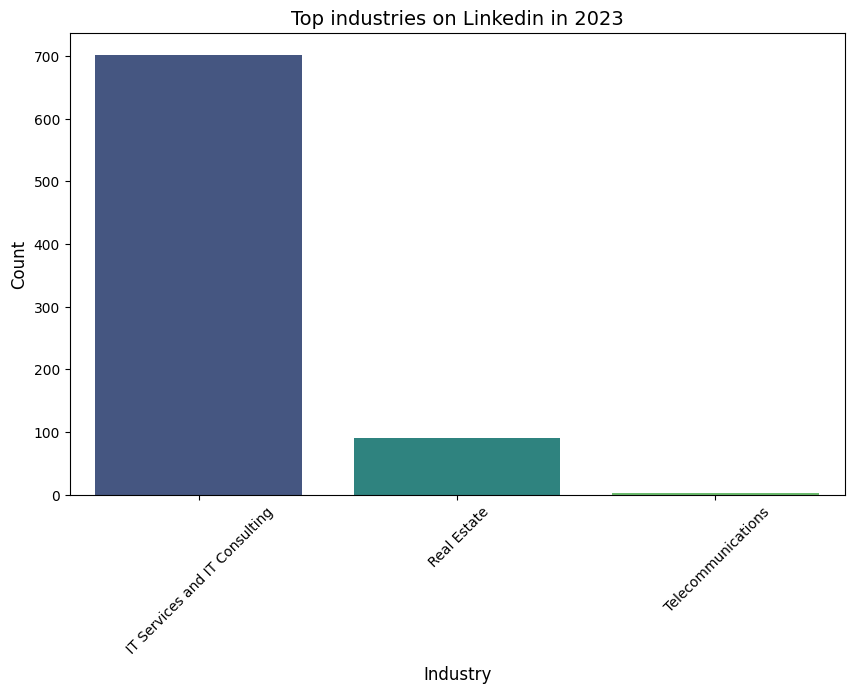

In [27]:
industries_count = df.Industry.value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

color_palette = sns.color_palette("viridis", len(industries_count))

sns.barplot(x=industries_count.index, y=industries_count.values, palette = color_palette)

plt.title('Top industries on Linkedin in 2023', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.show()